In [18]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import wfdb
import numpy as np

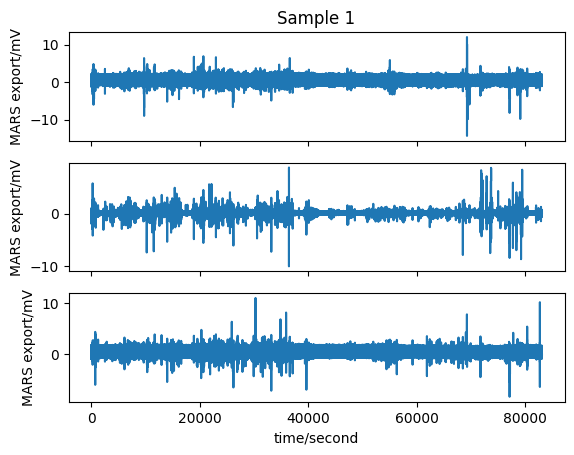

In [19]:
record = wfdb.rdrecord('../sample/sample_1')
wfdb.plot.plot_wfdb(record=record, title='Sample 1')

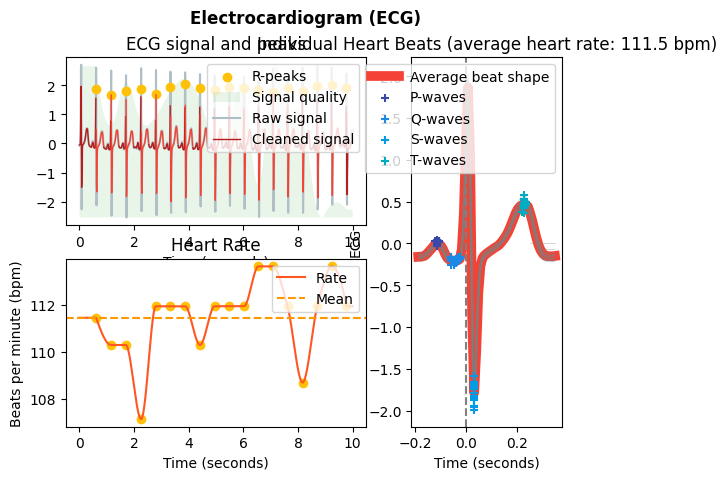

In [82]:
# data = record.p_signal[:1250, 1]

file_path = r'C:\Users\BMILab\Downloads\155_7_73455754.txt'
data = np.genfromtxt(file_path, delimiter='\t', dtype=float)[:1250,0]

ecg_signals, info = nk.ecg_process(data, sampling_rate=125)

nk.ecg_plot(ecg_signals, info)

In [83]:
PQRST = ecg_signals.loc[:, ['ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 
                            'ECG_R_Onsets', 'ECG_R_Peaks', 'ECG_R_Offsets', 
                            'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets']]

pqrst_list = [[],[],[],
              [],[],[],
              [],[],[]]
for i, row in PQRST.iterrows():    
    if i > 400:
        break
    
    for j, peak in enumerate(row):
        if peak == 1:
            pqrst_list[j].append(i)
    

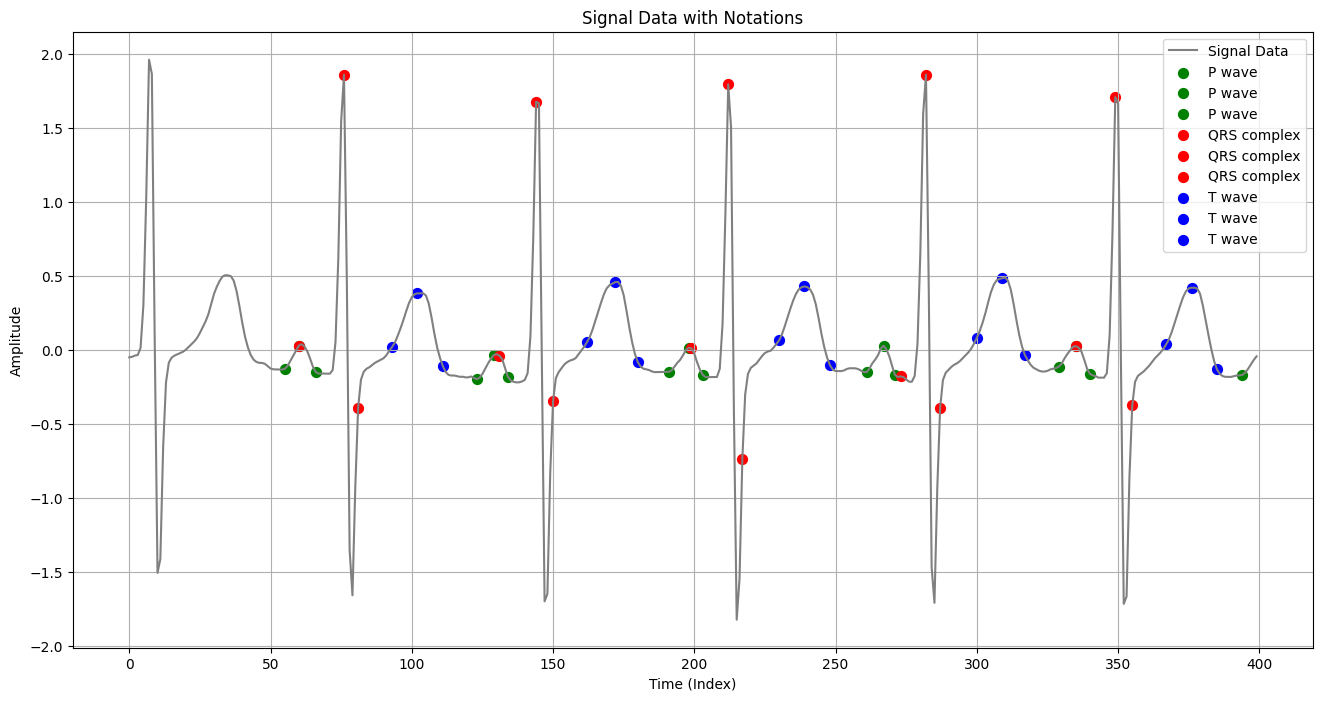

In [84]:
colors = ['g','g','g','r','r','r','b','b','b']  # 각 마킹의 색상
markers = ['o']*len(colors)     # 각 마킹의 심볼

# 신호 데이터 플로팅
plot_data = ecg_signals['ECG_Clean'][:400]
plt.figure(figsize=(16, 8))
plt.plot(plot_data, label='Signal Data', color='gray')  # 신호 데이터 그래프

# 각 종류의 마킹을 플롯에 추가
for i in range(len(colors)):  # notation_array의 열을 따라 반복
    if colors[i] == 'g':
        label = 'P wave'
    elif colors[i] == 'r':
        label = 'QRS complex'
    else:
        label = 'T wave'
    
    plt.scatter(pqrst_list[i], plot_data[pqrst_list[i]], 
                color=colors[i], marker=markers[i], s=50, label=label)

# 그래프에 추가 요소 설정
plt.title('Signal Data with Notations')
plt.xlabel('Time (Index)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()


### Save .mat file

In [65]:
file_path = r'C:\Users\BMILab\Downloads\155_7_73455754.txt'
data = np.genfromtxt(file_path, delimiter='\t', dtype=float)

In [66]:
data.shape

(37500, 3)

In [67]:
from scipy.io import loadmat, savemat

savemat('C:\\Users\\BMILab\\Documents\\GitHub\\CDM_Holter\\ECGdeli\\Example\\sample\\sample.mat', {'signal':data})